In [121]:
%matplotlib notebook
from Bio import SeqIO
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.ndimage.filters import gaussian_filter
from pathlib import Path

In [2]:
sequences = list(SeqIO.parse("data/Sample2_Extracted_Genes.fastq", "fastq"))

In [11]:
sequences[0]

SeqRecord(seq=Seq('CACTCTTCCAGCCTTCCTTCCTTAGGAAGGCTGGAAGAGTGCCTCAGGGCAGCG...CGT', SingleLetterAlphabet()), id='SRR6671111.2085868', name='SRR6671111.2085868', description='SRR6671111.2085868', dbxrefs=[])

In [18]:
len(sequences)

184680

In [ ]:
1,2,3 : cancer

In [ ]:
4,5,6 : non cancer

In [22]:
sequences = list(SeqIO.parse("data/P53_diff_species.fasta", "fasta"))

In [23]:
len(sequences)

11

In [13]:
sequences[0].seq

Seq('AAGTGCCGTTTCGGTTTAATCTAGTGTGTGACTGGGTCTGTGTGAGGGAGAGAG...AAA', SingleLetterAlphabet())

In [66]:
sequences[1].seq.translate()

Seq('ELCLE*CLSQCQGKATVPGRPPAPL*CI*ARETST*SWRPGSPGAGGGRSSWEL...N*T', HasStopCodon(ExtendedIUPACProtein(), '*'))

In [108]:
def generateMatrix(seq1, seq2):
    seq1 = str(seq1)
    seq2 = str(seq2)
    matrix = np.zeros((len(seq1),len(seq2),3), dtype = int)
    
    for i in range(len(seq1)):
        
        for j in range(len(seq2)):
            if seq1[i] == seq2[j]:
                AAType = getAAType(seq1[i])
                color = AAColors[AAType]
                matrix[i,j] = np.asarray(color)
            else:
                matrix[i,j] = np.asarray((24, 32, 40))
    return matrix


In [45]:
AAColors = ({"aliphatic":(192, 57, 43),
          "aromatic":(46, 204, 113),
          "acidic":(230, 126, 34),
         "basic":(52, 152, 219),
         "hydroxylic":(155, 89, 182),
         "sulfur":(241, 196, 15),
         "amidic":(25, 42, 86)})
def getAAType(oneLetterAA):
    if oneLetterAA in ["F","W","Y"]:
        return "aromatic"
    elif oneLetterAA in ["D","E"]:
        return "acidic"
    elif oneLetterAA in ["R","H","K"]:
        return "basic"
    elif oneLetterAA in ["S", "T"]:
        return "hydroxylic"
    elif oneLetterAA in ["C", "M"]:
        return "sulfur"
    elif oneLetterAA in ["N", "Q"]:
        return "amidic"
    else:
        return "aliphatic"

<IPython.core.display.Javascript object>


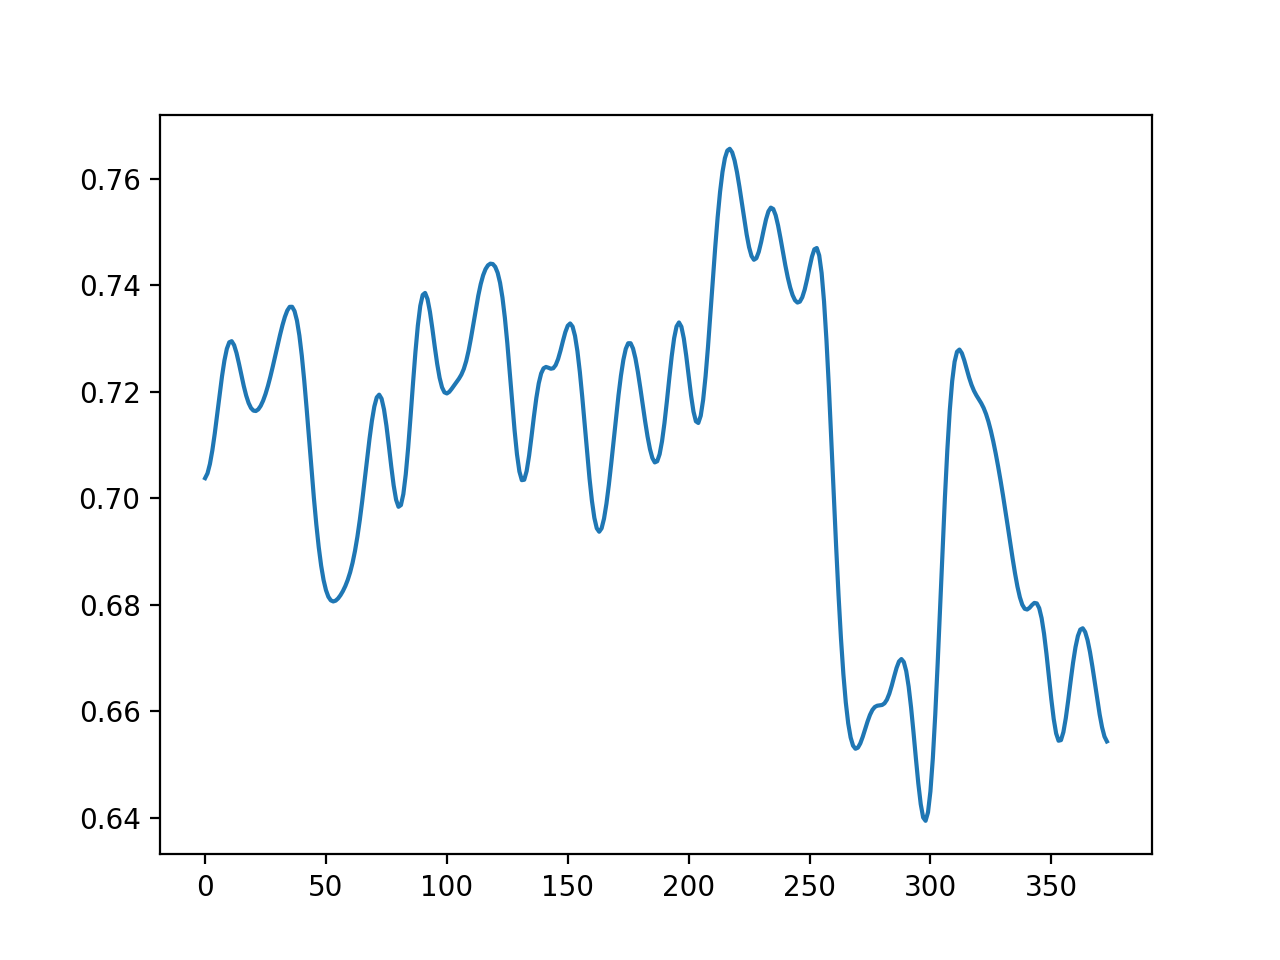

In [77]:
# Load hydrophobicity dic
import csv
reader = csv.reader(open('AAhydrophobicity.csv', 'r'))
hydrophobicities = {}
for row in reader:
   k, v = row
   hydrophobicities[k] = v

def getHydrophobicityCurve(sequence, sigma = 5):
    
    sequence = str(sequence)
    length = len(sequence)
    array = np.zeros(length)
    
    for i in range(length):
        array[i] = hydrophobicities[sequence[i]]
    
    array = gaussian_filter(array, sigma)
    return array
this = getHydrophobicityCurve(sequences[1].seq)

plt.figure()
plt.plot(this)

<IPython.core.display.Javascript object>


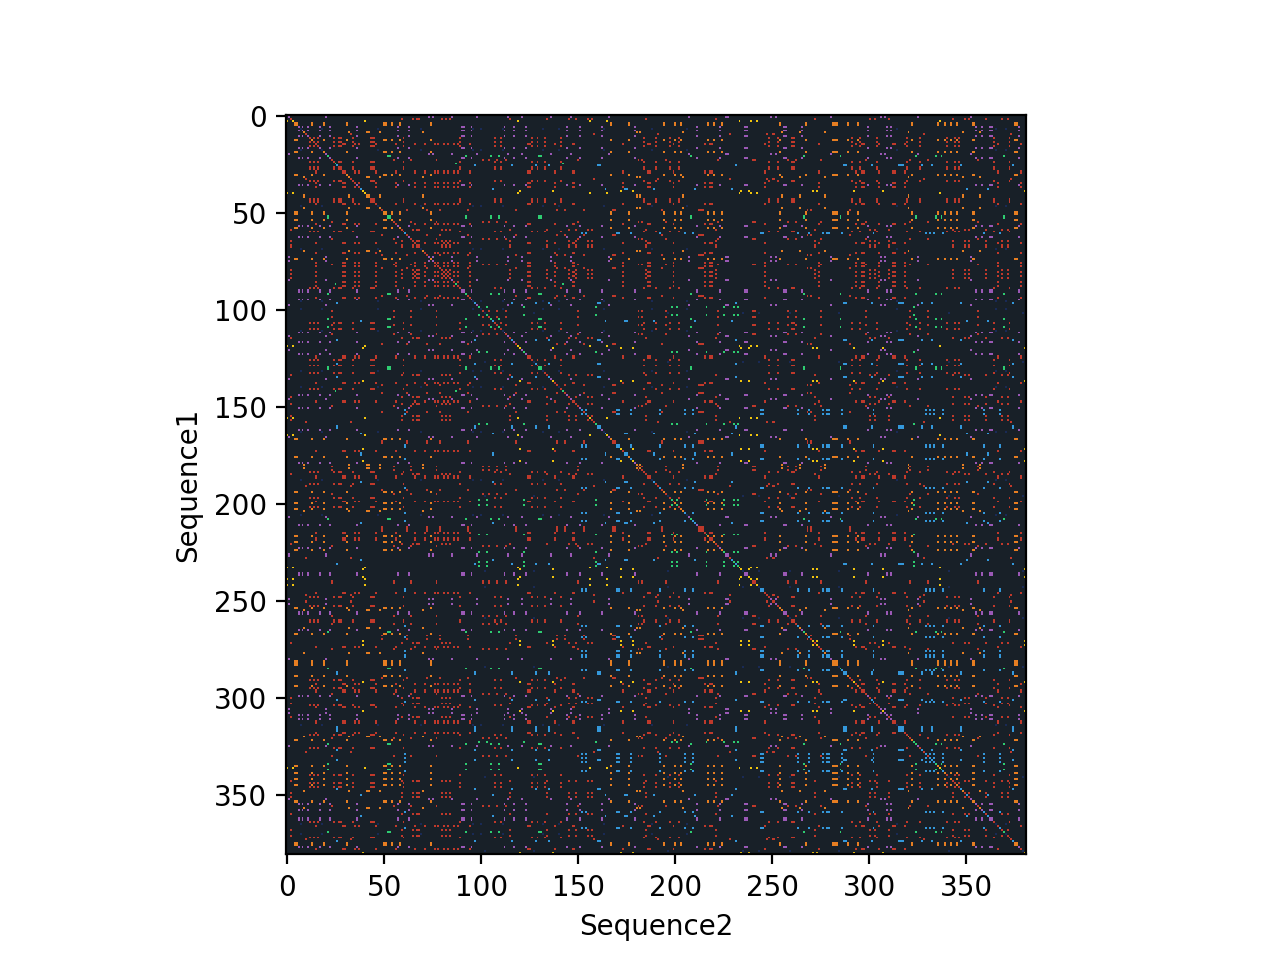

In [120]:
sequence1 = str(sequences[2].seq)
sequence2 = str(sequences[2].seq)

plt.figure()

m = generateMatrix(sequence1,sequence2)

#plt.axis("off")
plt.tight_layout()
plt.imshow(m)

plt.ylabel("Sequence1")
plt.xlabel("Sequence2")
plt.savefig("things1-3.png")

<IPython.core.display.Javascript object>


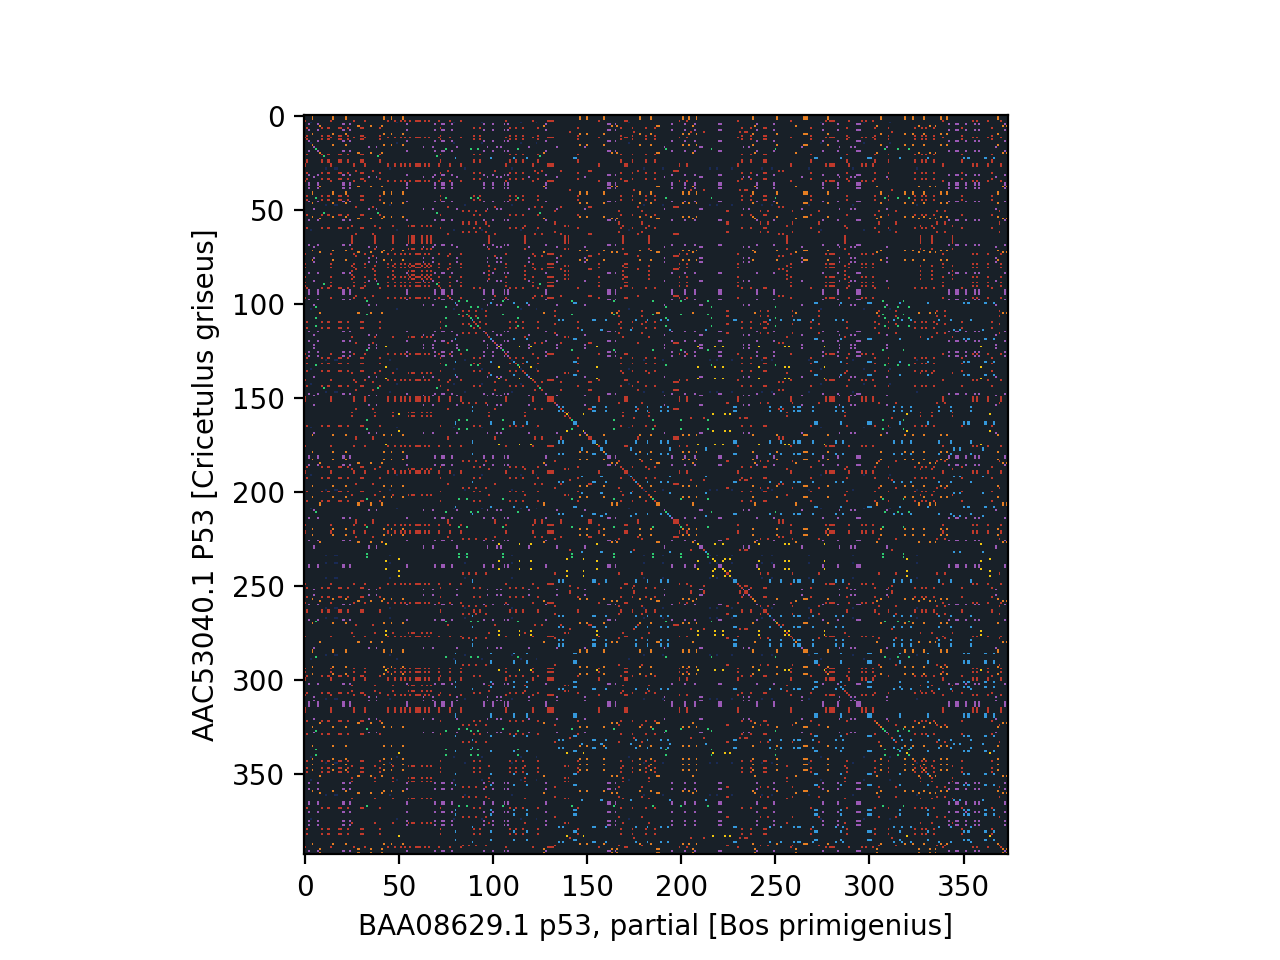

In [153]:
def extractGene(gene):
    """given path, returns the sequence and the description"""
    twoPart = gene.split("/")
    
    a = list(SeqIO.parse("data/"+twoPart[0], "fasta"))
    for sequence in a:
        if sequence.description == twoPart[1]:
            return (str(sequence.seq), twoPart[1])

def makeTheGraph(gene1, gene2):
    """Given two genes references, figures saves the graph for it"""
    gene1, desc1 = extractGene(gene1)
    gene2, desc2 = extractGene(gene2)
    
    

    m = generateMatrix(gene1,gene2)
    plt.figure()
    plt.tight_layout()
    plt.imshow(m)

    plt.ylabel(desc1)
    plt.xlabel(desc2)
    plt.savefig("static/things.png")
    
    
makeTheGraph('P53_diff_species.fasta/AAC53040.1 P53 [Cricetulus griseus]',
     'P53_diff_species.fasta/BAA08629.1 p53, partial [Bos primigenius]')

<IPython.core.display.Javascript object>


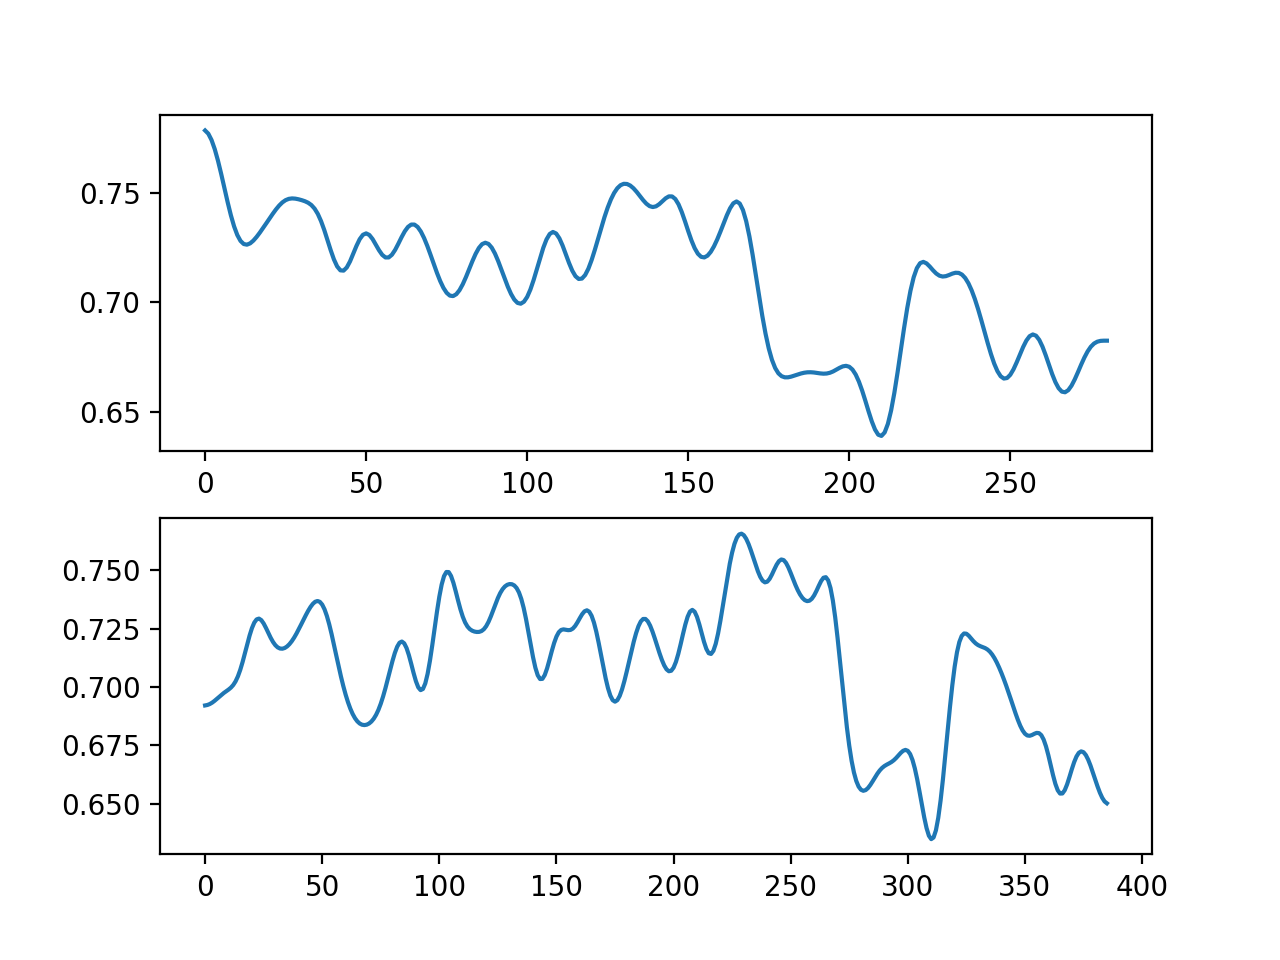

In [99]:
plt.figure()
this = getHydrophobicityCurve(sequence2)
plt.subplot(211)
plt.plot(this)


this = getHydrophobicityCurve(sequence1)
plt.subplot(212)
plt.plot(this)


In [147]:
def getListOfFiles():
    """Returns a list of all the sequences within uploads"""
    f = Path(".") / "uploads"
    
    listOfFasta = list(f.glob("*.fasta"))
    finalList = []
    for fasta in listOfFasta:
        a = list(SeqIO.parse(fasta, "fasta"))
        
        for sequence in a:
            finalList.append(fasta.name + "/" + sequence.description)
    return finalList
getListOfFiles()

['P53_diff_species.fasta/AAC53040.1 P53 [Cricetulus griseus]',
 'P53_diff_species.fasta/BAA08629.1 p53, partial [Bos primigenius]',
 'P53_diff_species.fasta/AAA39883.1 p53 [Mus musculus]',
 'P53_diff_species.fasta/AEG21062.2 p53 [Bubalus bubalis]',
 'P53_diff_species.fasta/AAC37335.1 p53, partial [Canis lupus familiaris]',
 'P53_diff_species.fasta/AAL83290.1 P53 [Delphinapterus leucas]',
 'P53_diff_species.fasta/CAA57349.1 p53 [Ovis aries]',
 'P53_diff_species.fasta/CAA54672.1 p53 [Xenopus laevis]',
 'P53_diff_species.fasta/AND76946.1 p53 [Microtus ochrogaster]',
 'P53_diff_species.fasta/BAC16799.1 P53 [Homo sapiens]']

In [146]:
a = list(SeqIO.parse("data/P53_diff_species.fasta", "fasta"))

a[0].description

'AAC53040.1 P53 [Cricetulus griseus]'

In [160]:
def findNextNumber(fileExtension):
    """Given a file extension, gives the next number"""
    p = Path(.) / "static"
    maximum = -1
    for subP in p.glob("*." + fileExtension):
        if str(subP.stem).isdigit():
            if int(str(subP.stem)) > maximum:
                maximum = int(str(subP.stem))
    return maximum + 1
findNextNumber("png")

0

In [156]:
import os